In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('salary_data_cleaned.csv')

In [7]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Modeler,$197K-$209K (Glassdoor est.),The database modeler shall perform analysis of...,4.7,IT Concepts\n4.7,"Landover, MD","Vienna, VA",51 to 200 employees,2003,Company - Private,...,197.0,IT Concepts\n,MD,0,17,0,0,0,0,0
1,Senior Data Scientist,$197K-$214K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.1,CK-12 Foundation\n4.1,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2007,Company - Private,...,197.0,CK-12 Foundation\n,CA,1,13,0,0,0,1,1
2,Lead Data Engineer,$190K-$220K(Employer est.),Credit Sesame is bringing cash and credit toge...,4.2,Credit Sesame\n4.2,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,Company - Private,...,190.0,Credit Sesame\n,CA,1,10,1,0,1,1,0
3,Lead Data Engineer,$190K-$220K(Employer est.),Credit Sesame is bringing cash and credit toge...,4.2,Credit Sesame\n4.2,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,Company - Private,...,190.0,Credit Sesame\n,CA,1,10,1,0,1,1,0
4,Lead Data Engineer,$190K-$220K(Employer est.),Credit Sesame is bringing cash and credit toge...,4.2,Credit Sesame\n4.2,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,Company - Private,...,190.0,Credit Sesame\n,CA,1,10,1,0,1,1,0


In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [21]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [22]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [23]:
df.job_simp.value_counts()

data scientist    310
na                155
data engineer     134
analyst           112
mle                26
manager            20
director            4
Name: job_simp, dtype: int64

In [24]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    241
Name: seniority, dtype: int64

In [25]:
##  Fix state Los Angeles 
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    190
NY     77
TX     45
MA     44
VA     42
IL     38
WA     35
MD     27
NC     24
PA     23
FL     23
OH     19
NJ     19
MO     18
CO     18
DC     14
AZ     12
GA     11
WI      9
IA      9
AL      6
KY      6
TN      6
MI      6
NM      5
LA      5
NH      5
DE      4
UT      4
MN      4
OK      2
ID      2
IN      2
NE      2
ND      1
OR      1
CT      1
MT      1
KS      1
Name: job_state, dtype: int64

In [26]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2723
1      4743
2      3556
3      3556
4      3556
       ... 
756    2801
757    2801
758    3799
759    3799
760    3846
Name: desc_len, Length: 761, dtype: int64

In [27]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [28]:
## hourly wage to annual 
df['avg_salary'] = df.apply(lambda x: x.avg_salary*2 if x.hourly == 1 else x.avg_salary, axis = 1)

In [29]:
df[df.hourly ==1][['hourly', 'avg_salary']]

,hourly,avg_salary
744,1,42.0
745,1,42.0
746,1,38.0
747,1,38.0
748,1,38.0
749,1,36.0
750,1,36.0
751,1,36.0
752,1,36.0
753,1,36.0


In [30]:
#remove new line from job title
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [31]:
df['company_txt']

0                                 IT Concepts
1                            CK-12 Foundation
2                               Credit Sesame
3                               Credit Sesame
4                               Credit Sesame
                        ...                  
756                          Beebe Healthcare
757                          Beebe Healthcare
758                            Pro-Sphere Tek
759                            Pro-Sphere Tek
760    Central California Alliance for Health
Name: company_txt, Length: 761, dtype: object

In [32]:
df.describe()

,Rating,Founded,hourly,employer_provided,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,761.000000,761.000000,761.000000,761.000000,758.000000,761.000000,761.000000,761.000000,761.0,761.000000,761.000000,761.000000,761.000000,761.000000
mean,3.669908,1821.131406,0.013141,0.009198,82.939314,0.559790,36.789750,0.609724,0.0,0.204993,0.248357,0.492773,3667.137976,1.065703
std,0.796787,539.527319,0.113952,0.095529,34.445124,0.496739,38.796438,0.488133,0.0,0.403962,0.432344,0.500277,1598.168761,1.360493
min,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,356.000000,0.000000
25%,3.300000,1952.000000,0.000000,0.000000,56.000000,0.000000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,2496.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,80.000000,1.000000,24.000000,1.000000,0.0,0.000000,0.000000,0.000000,3478.000000,0.000000
75%,4.100000,2007.000000,0.000000,0.000000,102.000000,1.000000,52.000000,1.000000,0.0,0.000000,0.000000,1.000000,4582.000000,3.000000
max,5.000000,2020.000000,1.000000,1.000000,197.000000,1.000000,276.000000,1.000000,0.0,1.000000,1.000000,1.000000,10051.000000,3.000000


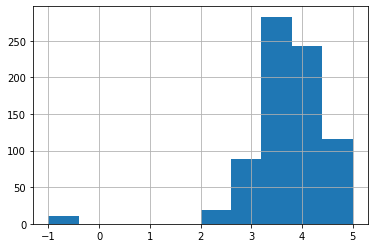

In [33]:
df.Rating.hist()

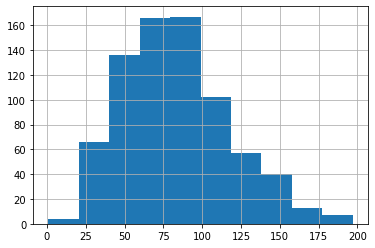

In [34]:
df.avg_salary.hist()

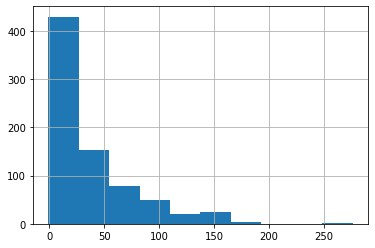

In [35]:
df.age.hist()

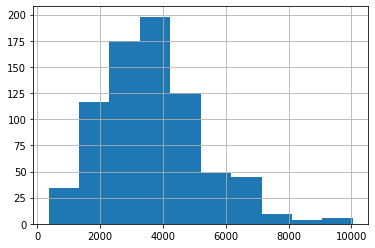

In [36]:
df.desc_len.hist()

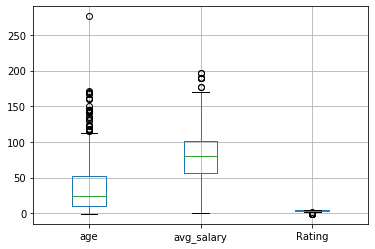

In [37]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

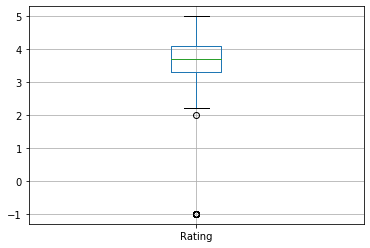

In [100]:
df.boxplot(column = 'Rating')

In [38]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.165764,-0.013583,0.129189
avg_salary,-0.165764,1.000000,0.036465,-0.055574
Rating,-0.013583,0.036465,1.000000,-0.107746
desc_len,0.129189,-0.055574,-0.107746,1.000000


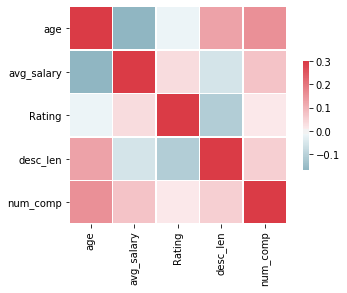

In [39]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), vmax = .3, center= 0, cmap=cmap,
           square=True, linewidths= .5, cbar_kws={"shrink": .5})

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [41]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state','python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority']]

Graph for Location: total = 186


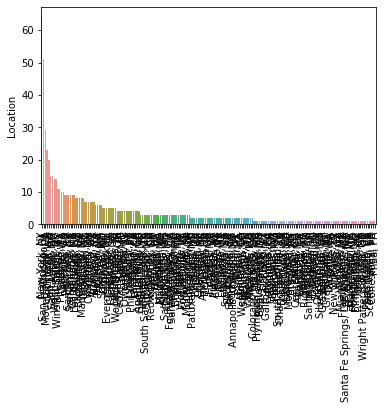

Graph for Headquarters: total = 188


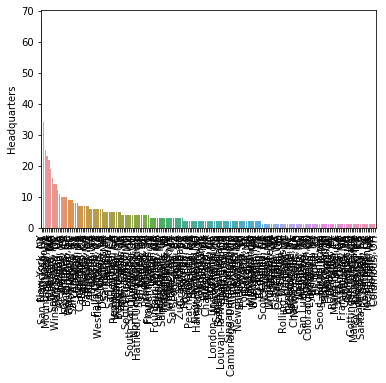

Graph for Size: total = 8


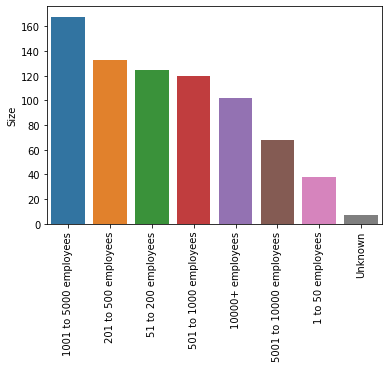

Graph for Type of ownership: total = 11


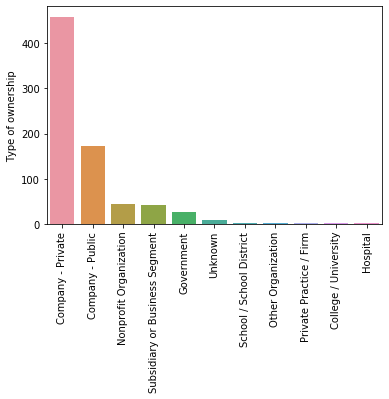

Graph for Industry: total = 58


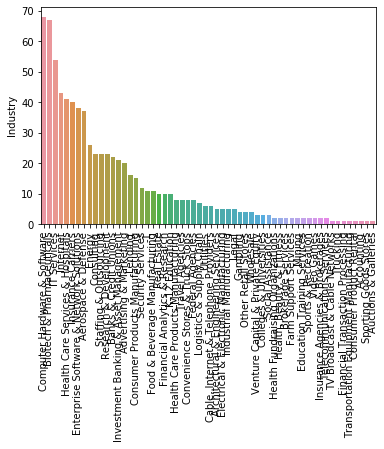

Graph for Sector: total = 25


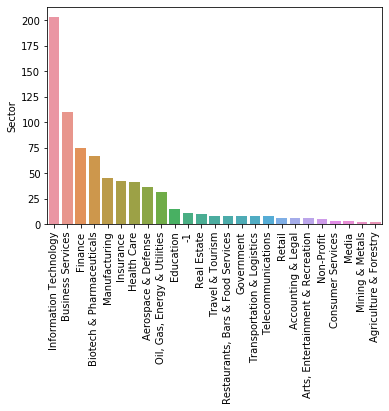

Graph for Revenue: total = 13


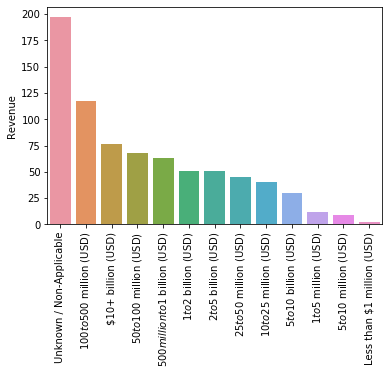

Graph for company_txt: total = 348


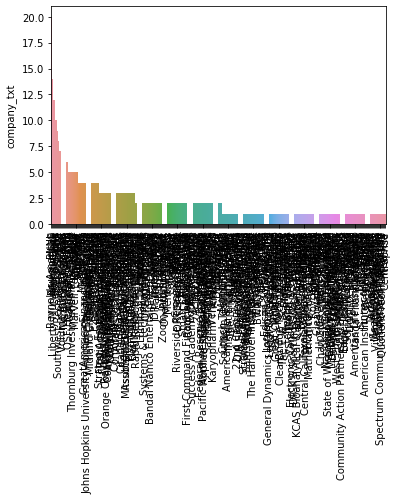

Graph for job_state: total = 39


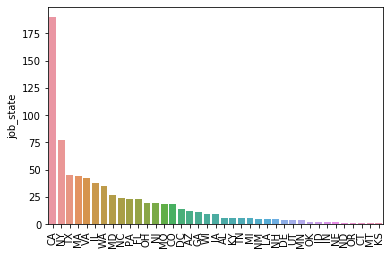

Graph for same_state: total = 2


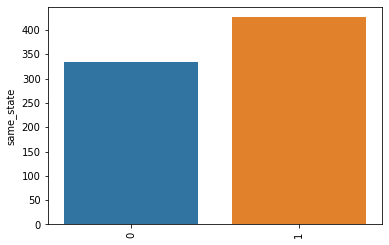

Graph for python_yn: total = 2


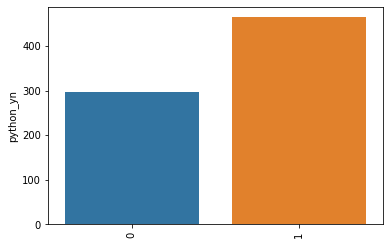

Graph for R_yn: total = 1


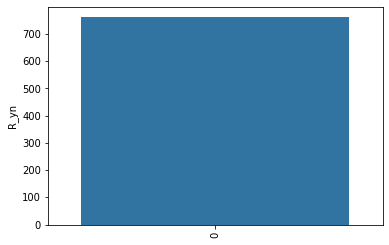

Graph for spark_yn: total = 2


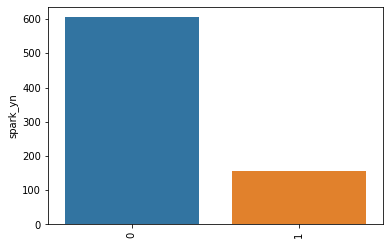

Graph for aws_yn: total = 2


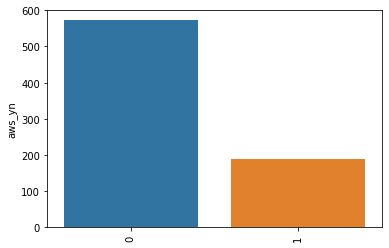

Graph for excel_yn: total = 2


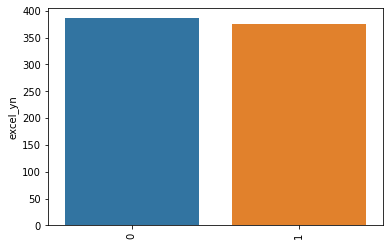

Graph for job_simp: total = 7


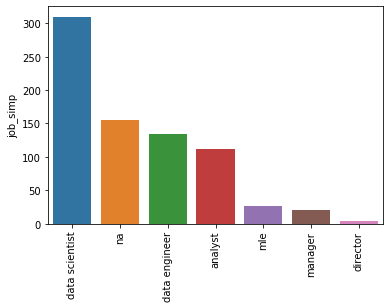

Graph for seniority: total = 2


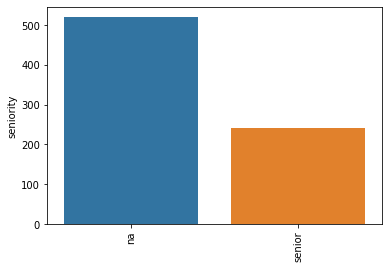

In [42]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location: total = 20


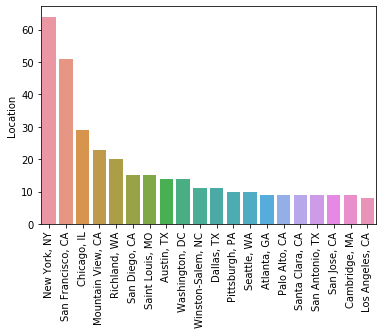

Graph for Headquarters: total = 20


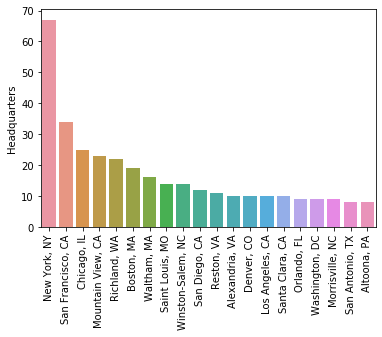

Graph for company_txt: total = 20


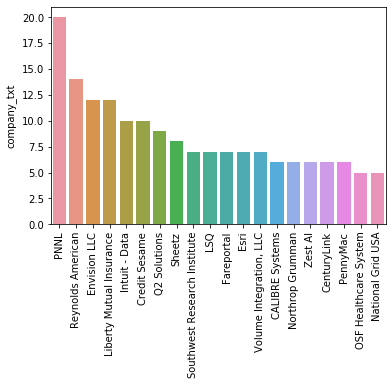

In [43]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [44]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,57.089286
data engineer,96.734848
data scientist,91.338710
director,104.500000
manager,67.947368
mle,110.115385
na,69.793548


In [45]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          53.258824
               senior      69.148148
data engineer  na          84.213333
               senior     113.210526
data scientist na          84.745192
               senior     104.784314
director       na         104.500000
manager        na          71.875000
               senior      47.000000
mle            na          98.529412
               senior     132.000000
na             na          63.571429
               senior      86.000000

In [135]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [46]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       2
          manager                  3
          data scientist           3
          analyst                  1
WA        na                       1
...                              ...
AZ        analyst                  1
          na                       2
          data engineer            6
AL        na                       2
          analyst                  4

[119 rows x 1 columns]

In [58]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
TN,130.000000
NJ,120.333333
UT,111.500000
DC,108.166667
CA,105.000000
WI,104.000000
CT,99.000000
VA,95.913043
GA,91.000000


In [64]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary']]

In [72]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values ="avg_salary").sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 5.0    111.000000
 4.2     97.562500
 3.5     95.050000
-1.0     94.727273
 3.9     93.370370
 4.7     91.863636
 3.0     90.900000
 3.3     90.194444
 4.4     88.470588
 3.8     85.800000
 2.5     85.750000
 4.0     84.302326
 3.7     83.836066
 3.6     77.819672
 3.1     77.535714
 4.1     76.441176
 3.4     76.093023
 4.5     75.500000
 3.2     74.948718
 4.8     74.000000
 2.7     73.800000
 4.3     72.708333
 2.6     71.250000
 2.2     71.000000
 4.6     68.294118
 2.8     68.083333
 2.3     67.000000
 2.9     61.300000
 4.9     61.166667
 2.4     56.500000
 2.0     39.000000
Industry
                                         avg_salary
Industry                                           
Financial Transaction Processing         146.000000
Internet                                 116.674419
K-12 Education                           116.600000
Accounting                               112.000000
Electrical & Electronic Manufacturing    110.

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [79]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,35.0
$1 to $5 million (USD),NaN,12.0
$10 to $25 million (USD),14.0,26.0
$10+ billion (USD),26.0,50.0
$100 to $500 million (USD),53.0,64.0
$2 to $5 billion (USD),24.0,27.0
$25 to $50 million (USD),23.0,22.0
$5 to $10 billion (USD),14.0,16.0
$5 to $10 million (USD),4.0,5.0


In [103]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()